In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Survey.csv')

In [4]:
subset_data = data.iloc[:, 18:46]
print(subset_data.head())

   2.Proximity to schools  3. Proximity to transport  \
0                       5                          5   
1                       5                          5   
2                       2                          5   
3                       5                          3   
4                       2                          3   

   4. Proximity to work place  5. Proximity to shopping  \
0                           2                         1   
1                           3                         1   
2                           2                         1   
3                           5                         4   
4                           4                         3   

   1. Gym/Pool/Sports facility  2. Parking space  3.Power back-up  \
0                            2                 5                3   
1                            1                 4                2   
2                            4                 3                2   
3                            5  

In [5]:
numeric_data = subset_data.select_dtypes(include=['float64', 'int64'])

In [6]:
print(numeric_data.isna().sum().sum())

0


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [8]:
pca = PCA()
pca_result = pca.fit(scaled_data)

In [9]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

Explained variance by each component: [0.31345961 0.09438265 0.06646745 0.06448555 0.05903805 0.04857417
 0.04706409 0.04288021 0.03587397 0.02855187 0.0263251  0.02285972
 0.0198852  0.01961358 0.01816526 0.01603945 0.01324205 0.0117195
 0.01062239 0.00886773 0.00772002 0.00712372 0.00505614 0.0041258
 0.00310811 0.00209859 0.00177019 0.0008798 ]


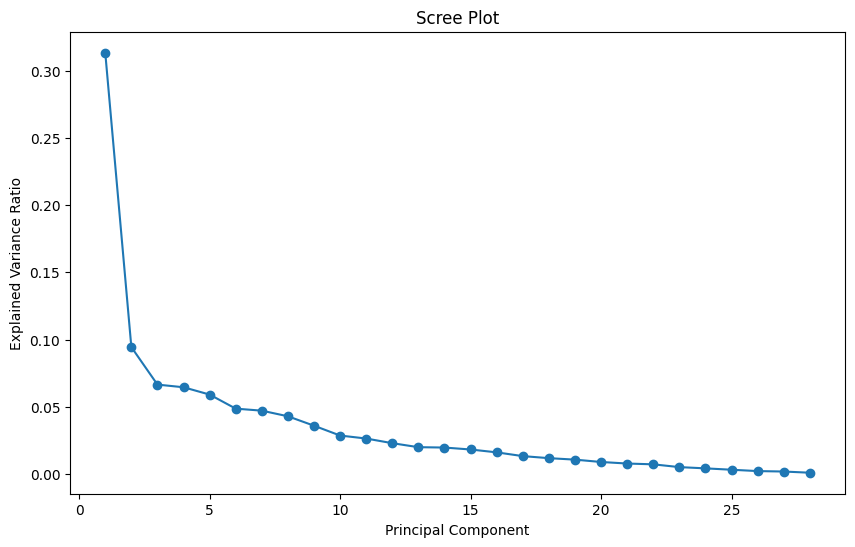

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

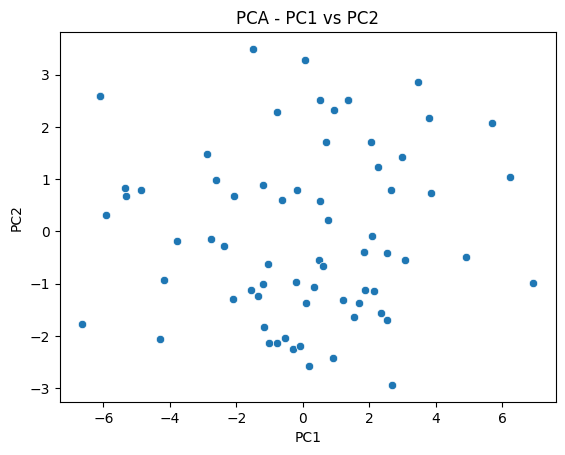

In [11]:
pca_data = pca.transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA - PC1 vs PC2')
plt.show()

In [12]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 644.4 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42567 sha256=52d7b986e1bf02594ad13d388309df4d3a7492c734a047cedc920e2e60fa9476
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [13]:
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity


In [14]:
kmo_all, kmo_model = calculate_kmo(numeric_data)
print('KMO Test: ', kmo_model)

KMO Test:  0.6899896861766692


In [15]:
chi_square_value, p_value = calculate_bartlett_sphericity(numeric_data)
print('Bartlett\'s Test: ', chi_square_value, p_value)


Bartlett's Test:  1291.9915434035404 3.083806132091647e-100


In [16]:
fa = FactorAnalyzer(rotation='varimax')
fa.fit(numeric_data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [17]:
ev, v = fa.get_eigenvalues()
print("Eigenvalues:", ev)


Eigenvalues: [8.77686919 2.64271414 1.86108858 1.80559538 1.65306543 1.36007666
 1.31779443 1.20064601 1.00447108 0.79945247 0.73710276 0.64007208
 0.55678569 0.54918027 0.50862739 0.44910468 0.37077744 0.32814606
 0.29742695 0.24829655 0.21616058 0.19946421 0.14157204 0.11552251
 0.08702703 0.05876066 0.04956537 0.02463434]


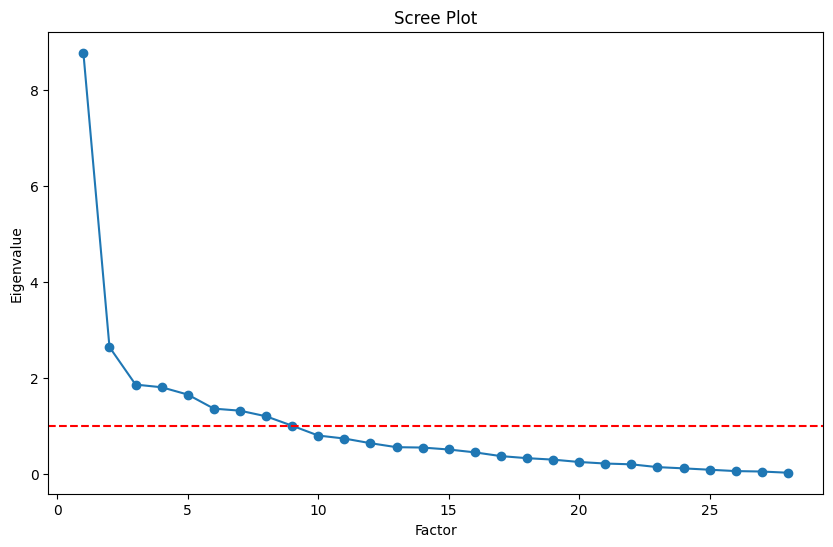

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

In [19]:
n_factors = sum(ev > 1)

In [20]:
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(numeric_data)

FactorAnalyzer(n_factors=9, rotation='varimax', rotation_kwargs={})

In [21]:
loadings = fa.loadings_
print(pd.DataFrame(loadings, columns=[f'Factor{i+1}' for i in range(loadings.shape[1])], index=numeric_data.columns))

                                            Factor1   Factor2   Factor3  \
2.Proximity to schools                     0.214049  0.229875  0.072246   
3. Proximity to transport                 -0.100885  0.010808 -0.042723   
4. Proximity to work place                 0.066845 -0.073512  0.057797   
5. Proximity to shopping                   0.220758  0.601192  0.292981   
1. Gym/Pool/Sports facility                0.249095  0.519146  0.068143   
2. Parking space                           0.252232  0.347771  0.450041   
3.Power back-up                            0.201595  0.293063  0.229838   
4.Water supply                             0.383765  0.373737  0.078538   
5.Security                                 0.160431  0.811676  0.122991   
1. Exterior look                           0.436751  0.301109  0.486234   
2. Unit size                               0.076976  0.027298  0.071432   
3. Interior design and branded components  0.384790  0.302596  0.601414   
4. Layout plan (Integrate